# Finansal Analiz Çalışması

Aşağıdaki uygulama Yahoo Finance API'sinden geçmiş piyasa verilerini Pythonic bir şekilde almamızı sağlayan bir python paketi olan *Yfinance* vasıtasıyla farklı finansal araçlara ait hisse senetlerine ilişkin gün sonu verilerini, son 5 senelik mali veri kümesi üzerinde Python programlama dilinin **'Pandas'**, **'NumPy'**, **'Matplotlib'** kütüphanelerinı kullanarak elde eden finansal analiz çalışmalarını içermektedir.

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from pylab import plt, mpl
plt.style.use('ggplot')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:
liste = ['AAPL', 'GOOG', 'MSFT', 'MRVL', 'WMT', 'INTC', 'TSLA', 'CSCO', 'NICE', 'PANW']

In [3]:
veri = yf.download(liste, start='2018-01-01', end='2023-11-15' )['Close']

[*********************100%%**********************]  10 of 10 completed


In [5]:
veri.head()

,AAPL,CSCO,GOOG,INTC,MRVL,MSFT,NICE,PANW,TSLA,WMT
Date,,,,,,,,,,
2018-01-02,43.064999,38.860001,53.250000,46.849998,22.200001,85.949997,92.190002,49.516666,21.368668,98.589996
2018-01-03,43.057499,39.169998,54.124001,45.259998,22.889999,86.349998,92.099998,49.893333,21.150000,99.449997
2018-01-04,43.257500,38.990002,54.320000,44.430000,23.410000,87.110001,92.680000,49.753334,20.974667,99.540001
2018-01-05,43.750000,39.529999,55.111500,44.740002,23.000000,88.190002,92.790001,50.990002,21.105333,100.129997
2018-01-08,43.587502,39.939999,55.347000,44.740002,23.170000,88.279999,93.989998,51.216667,22.427334,101.610001


In [6]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1478 entries, 2018-01-02 to 2023-11-14
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1478 non-null   float64
 1   CSCO    1478 non-null   float64
 2   GOOG    1478 non-null   float64
 3   INTC    1478 non-null   float64
 4   MRVL    1478 non-null   float64
 5   MSFT    1478 non-null   float64
 6   NICE    1478 non-null   float64
 7   PANW    1478 non-null   float64
 8   TSLA    1478 non-null   float64
 9   WMT     1478 non-null   float64
dtypes: float64(10)
memory usage: 127.0 KB


Tüm veri setinin birden fazla alt grafik aracılığıyla görselleştirilmesi:

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

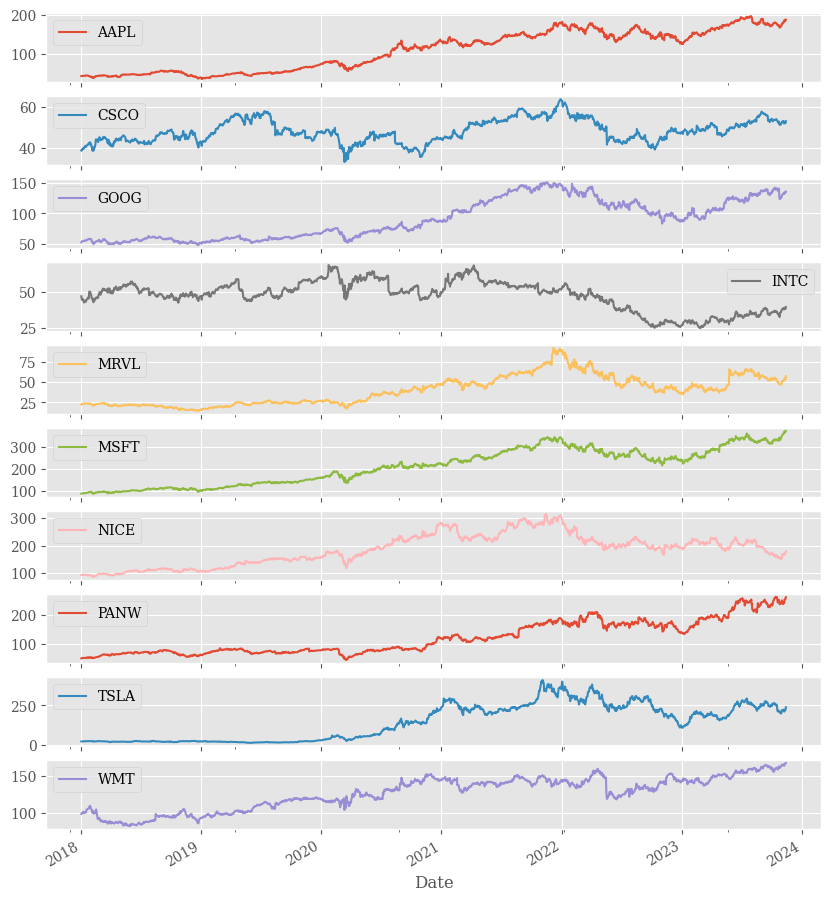

In [7]:
veri.plot(figsize=(10,12), subplots=True)

                Tüm veri seti icin cizgi grafikleri olarak finansal zaman serisi verileri

In [7]:
s_isim = ['Apple Inc.', 'Cisco Systems, Inc.',
          'Alphabet Inc.', 'Intel Corporation',
          'Marvell Technology, Inc.','Microsoft Corporation', 
          'NICE Ltd.', 'Palo Alto Networks, Inc.',
          'Tesla, Inc.', 'Walmart Inc.']        

In [8]:
for n, isim in zip(veri.columns, s_isim):
    print('{:8s} | {}'.format(n,isim))

AAPL     | Apple Inc.
CSCO     | Cisco Systems, Inc.
GOOG     | Alphabet Inc.
INTC     | Intel Corporation
MRVL     | Marvell Technology, Inc.
MSFT     | Microsoft Corporation
NICE     | NICE Ltd.
PANW     | Palo Alto Networks, Inc.
TSLA     | Tesla, Inc.
WMT      | Walmart Inc.


Veri setindeki her sütunun faydalı standart istatistiklerinin alınması:

In [8]:
veri.describe().round(3)

,AAPL,CSCO,GOOG,INTC,MRVL,MSFT,NICE,PANW,TSLA,WMT
count,1478.000,1478.000,1478.000,1478.000,1478.000,1478.000,1478.000,1478.000,1478.000,1478.000
mean,108.701,48.395,90.584,47.341,39.781,210.408,185.165,121.232,143.924,126.613
std,50.146,5.491,31.492,10.162,17.515,80.689,56.970,57.397,113.807,22.284
min,35.548,33.200,48.811,24.900,14.410,85.010,85.610,44.193,11.931,82.400
25%,53.326,44.320,59.661,42.562,23.593,133.742,138.717,71.796,22.204,108.247
50%,121.600,47.540,87.428,49.170,39.475,217.590,192.245,101.197,147.497,132.155
75%,150.990,52.960,119.482,54.137,52.922,280.220,223.947,169.283,240.024,144.043
max,196.450,63.960,150.709,68.470,91.510,370.270,315.020,261.740,409.970,167.680


In [9]:
veri.aggregate(['min', 'mean', 'std', 'median', 'max']).round(2)

,AAPL,CSCO,GOOG,INTC,MRVL,MSFT,NICE,PANW,TSLA,WMT
min,35.55,33.20,48.81,24.90,14.41,85.01,85.61,44.19,11.93,82.40
mean,108.70,48.39,90.58,47.34,39.78,210.41,185.16,121.23,143.92,126.61
std,50.15,5.49,31.49,10.16,17.51,80.69,56.97,57.40,113.81,22.28
median,121.60,47.54,87.43,49.17,39.48,217.59,192.25,101.20,147.50,132.15
max,196.45,63.96,150.71,68.47,91.51,370.27,315.02,261.74,409.97,167.68


### Yüzdelik Degisim Analizi

Istatiksel analiz yöntemi olarak veriye ait yüzdelik değisimin, zaman serisi dahilinde süreç icindeki değısikliklerinin hesaplanması:

Veriyi öncelikle normalizasyon işlemine tabi tutalım:

In [10]:
norm_veri = veri.div(veri.iloc[0]).mul(100)

<Axes: xlabel='Date'>

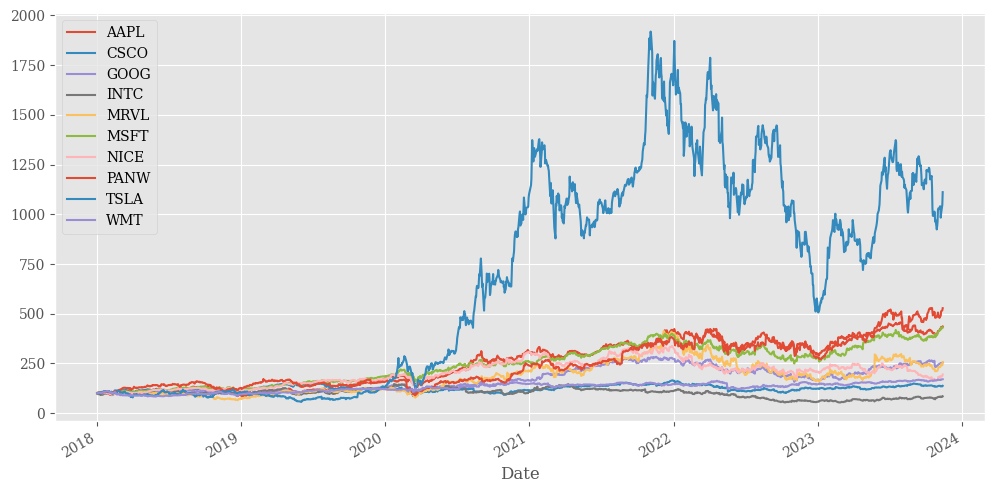

In [11]:
norm_veri.plot(figsize=(12,6))

Yüzdelik değişimin hesaplanması:

In [12]:
y_deg = veri.pct_change(fill_method=None).head().round(3)

In [13]:
y_deg

,AAPL,CSCO,GOOG,INTC,MRVL,MSFT,NICE,PANW,TSLA,WMT
Date,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000,0.008,0.016,-0.034,0.031,0.005,-0.001,0.008,-0.010,0.009
2018-01-04,0.005,-0.005,0.004,-0.018,0.023,0.009,0.006,-0.003,-0.008,0.001
2018-01-05,0.011,0.014,0.015,0.007,-0.018,0.012,0.001,0.025,0.006,0.006
2018-01-08,-0.004,0.010,0.004,0.000,0.007,0.001,0.013,0.004,0.063,0.015


Her sütuna ait bilgiler:

In [14]:
y_deg.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,4.0,0.00300,0.006481,-0.004,-0.00100,0.0025,0.00650,0.011
CSCO,4.0,0.00675,0.008221,-0.005,0.00475,0.0090,0.01100,0.014
GOOG,4.0,0.00975,0.006652,0.004,0.00400,0.0095,0.01525,0.016
INTC,4.0,-0.01125,0.018464,-0.034,-0.02200,-0.0090,0.00175,0.007
MRVL,4.0,0.01075,0.021608,-0.018,0.00075,0.0150,0.02500,0.031
MSFT,4.0,0.00675,0.004787,0.001,0.00400,0.0070,0.00975,0.012
NICE,4.0,0.00475,0.006238,-0.001,0.00050,0.0035,0.00775,0.013
PANW,4.0,0.00850,0.011902,-0.003,0.00225,0.0060,0.01225,0.025
TSLA,4.0,0.01275,0.034248,-0.010,-0.00850,-0.0010,0.02025,0.063
WMT,4.0,0.00775,0.005852,0.001,0.00475,0.0075,0.01050,0.015


Standart sapma ve ortalama değerleri alınarak karsılastırmalı bir analiz yapılırsa;

In [15]:
y_deg_des = y_deg.describe().T.loc[:,['mean', 'std']]
y_deg_des

,mean,std
AAPL,0.00300,0.006481
CSCO,0.00675,0.008221
GOOG,0.00975,0.006652
INTC,-0.01125,0.018464
MRVL,0.01075,0.021608
MSFT,0.00675,0.004787
NICE,0.00475,0.006238
PANW,0.00850,0.011902
TSLA,0.01275,0.034248
WMT,0.00775,0.005852


In [16]:
y_deg_des['mean'] = y_deg_des['mean'] * 252
y_deg_des['std'] = y_deg_des['std'] * np.sqrt(252)
y_deg_des

,mean,std
AAPL,0.756,0.102879
CSCO,1.701,0.130503
GOOG,2.457,0.105598
INTC,-2.835,0.293106
MRVL,2.709,0.343020
MSFT,1.701,0.075993
NICE,1.197,0.099030
PANW,2.142,0.188944
TSLA,3.213,0.543668
WMT,1.953,0.092903


Bir grafik halinde, her bir hisse senedine karsılık gelen noktanın belirlendiği bir for döngüsü yaratırsak;

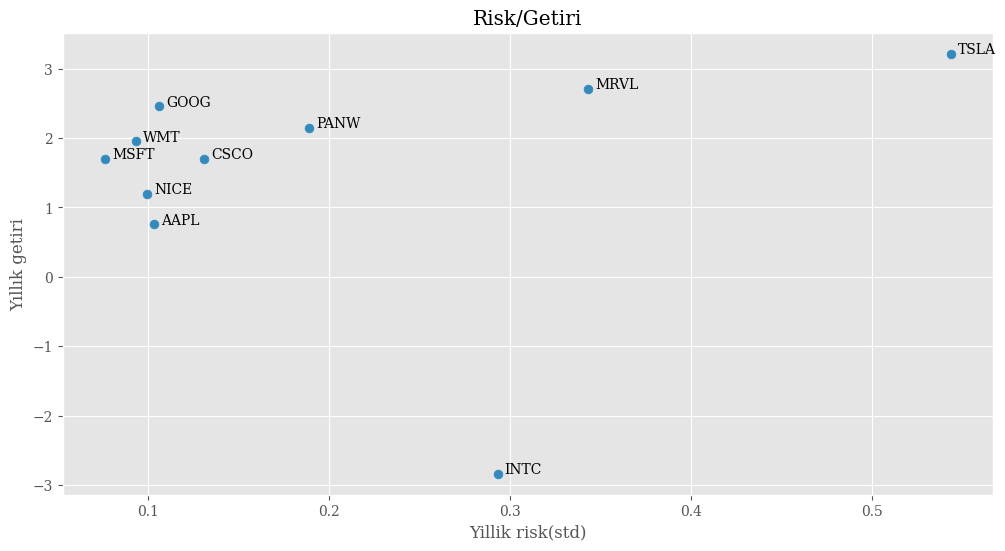

In [17]:
y_deg_des.plot.scatter(x='std', y='mean', figsize=(12,6), s=40)
for value in y_deg_des.index:
    plt.annotate(value, xy=(y_deg_des.loc[value, 'std'] + 0.004, y_deg_des.loc[value, 'mean'] + 0.004), size=10)
    plt.xlabel('Yillik risk(std)')
    plt.ylabel('Yıllık getiri')
    plt.title('Risk/Getiri')

*TSLA(Tesla)*'nin getirileri fazla ancak riskinin de çok yüksek olduğunu görebiliyoruz. *GOOG(Alphabet Inc.)* düsük risk ve yüksek getiri ile daha cazip bir seçenek olarak duruyor. *INTC(Intel Corporation)* şirketinin ise hem risk yüksekliğine hem de daha az getiriye sahip olduğu tespit edilebiliyor. Örnegin *Walmart* ve *Microsoft* arasında yapılacak bir yatırım tercihinde riskler nispeten yakın olduğu icin daha yüksek getiriye sahip Walmart(WMT) tercih edilebilir. 

### Korelasyon ve Kovaryans

In [18]:
y_deg.cov()   # kovaryans

,AAPL,CSCO,GOOG,INTC,MRVL,MSFT,NICE,PANW,TSLA,WMT
AAPL,0.000042,0.000003,0.000017,0.000041,-0.000080,0.000031,-0.000023,0.000047,-0.000126,-0.000027
CSCO,0.000003,0.000068,0.000032,0.000073,-0.000113,-0.000003,-0.000007,0.000080,0.000110,0.000031
GOOG,0.000017,0.000032,0.000044,-0.000024,-0.000024,0.000012,-0.000037,0.000059,-0.000116,-0.000001
INTC,0.000041,0.000073,-0.000024,0.000341,-0.000370,0.000019,0.000049,0.000113,0.000367,0.000022
MRVL,-0.000080,-0.000113,-0.000024,-0.000370,0.000467,-0.000046,-0.000008,-0.000203,-0.000236,-0.000011
MSFT,0.000031,-0.000003,0.000012,0.000019,-0.000046,0.000023,-0.000018,0.000029,-0.000110,-0.000023
NICE,-0.000023,-0.000007,-0.000037,0.000049,-0.000008,-0.000018,0.000039,-0.000037,0.000182,0.000017
PANW,0.000047,0.000080,0.000059,0.000113,-0.000203,0.000029,-0.000037,0.000142,-0.000029,0.000005
TSLA,-0.000126,0.000110,-0.000116,0.000367,-0.000236,-0.000110,0.000182,-0.000029,0.001173,0.000163
WMT,-0.000027,0.000031,-0.000001,0.000022,-0.000011,-0.000023,0.000017,0.000005,0.000163,0.000034


In [19]:
y_deg.corr()   # korelasyon

,AAPL,CSCO,GOOG,INTC,MRVL,MSFT,NICE,PANW,TSLA,WMT
AAPL,1.000000,0.050052,0.402069,0.339852,-0.571276,0.988476,-0.560654,0.613633,-0.569193,-0.720672
CSCO,0.050052,1.000000,0.577539,0.482574,-0.636589,-0.078347,-0.144618,0.815888,0.390400,0.635674
GOOG,0.402069,0.577539,1.000000,-0.196081,-0.169867,0.384684,-0.885590,0.738866,-0.508078,-0.036390
INTC,0.339852,0.482574,-0.196081,1.000000,-0.927589,0.210244,0.424683,0.514945,0.579716,0.205909
MRVL,-0.571276,-0.636589,-0.169867,-0.927589,1.000000,-0.442278,-0.059966,-0.788653,-0.319466,-0.090280
MSFT,0.988476,-0.078347,0.384684,0.210244,-0.442278,1.000000,-0.605529,0.511891,-0.673481,-0.812036
NICE,-0.560654,-0.144618,-0.885590,0.424683,-0.059966,-0.605529,1.000000,-0.496066,0.849913,0.463358
PANW,0.613633,0.815888,0.738866,0.514945,-0.788653,0.511891,-0.496066,1.000000,-0.071552,0.074173
TSLA,-0.569193,0.390400,-0.508078,0.579716,-0.319466,-0.673481,0.849913,-0.071552,1.000000,0.811171
WMT,-0.720672,0.635674,-0.036390,0.205909,-0.090280,-0.812036,0.463358,0.074173,0.811171,1.000000


Bir ısı haritası şeklinde korelasyon grafiği oluşturulursa;

In [20]:
import seaborn as sns

<Axes: >

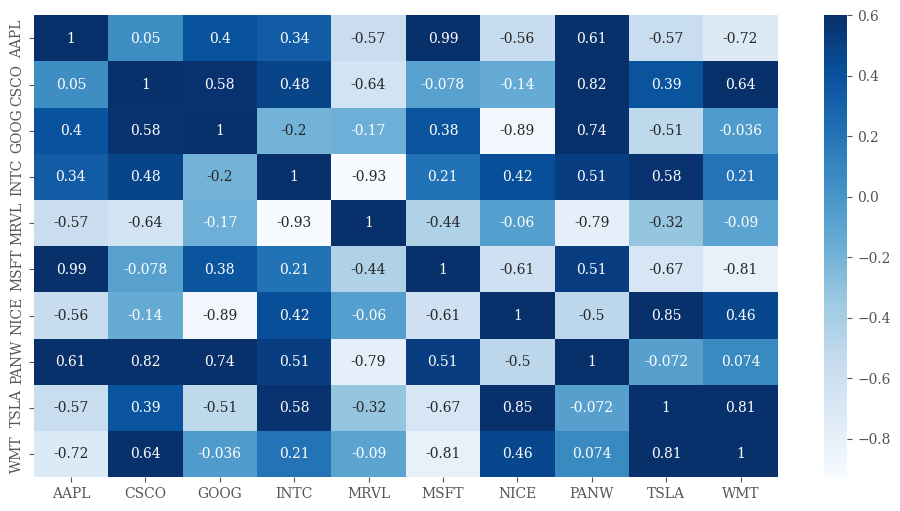

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(y_deg.corr(), cmap='Blues', annot=True, vmax=0.6)

### Logaritmik Analiz

Bir zaman serisindeki zaman içindeki değişiklikleri hesaplamak icin logaritmik getiriler de alternatif olarak hesaplanabilir:

In [22]:
rets = np.log(veri / veri.shift(1))       # Günlük getirilerini vektörize biçimde hesaplar.

In [23]:
rets.head().round(3)

,AAPL,CSCO,GOOG,INTC,MRVL,MSFT,NICE,PANW,TSLA,WMT
Date,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000,0.008,0.016,-0.035,0.031,0.005,-0.001,0.008,-0.010,0.009
2018-01-04,0.005,-0.005,0.004,-0.019,0.022,0.009,0.006,-0.003,-0.008,0.001
2018-01-05,0.011,0.014,0.014,0.007,-0.018,0.012,0.001,0.025,0.006,0.006
2018-01-08,-0.004,0.010,0.004,0.000,0.007,0.001,0.013,0.004,0.061,0.015


Aşağıdaki grafik her bir finansal zaman serisi için kümülatif logaritmik getirilerini göstermektedir. Önce *cumsum()* yöntemi çağrılır, ardından sonuçlara *np.exp()* (numpy kütüphanesinin ekponansiyel fonsksiyonu) uygulanır.

<Axes: xlabel='Date'>

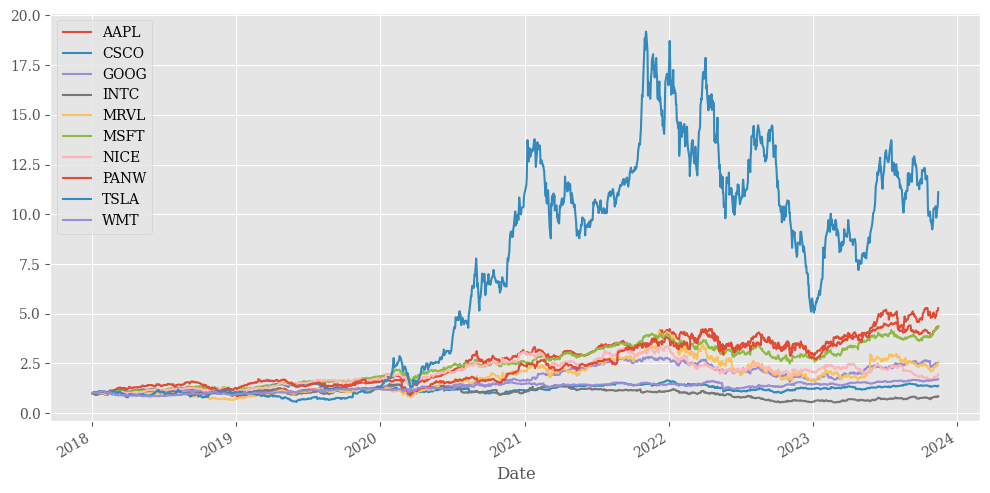

In [24]:
rets.cumsum().apply(np.exp).plot(figsize=(12,6))

### Yeniden Örnekleme

Yeniden örnekleme, finansal zaman serisi verileri üzerinde önemli bir işlemdir. Örnegin günlük gözlemleri içeren bir zaman serisinin haftalık veya aylık gözlemlerle yeniden örneklenmesi anlamına gelir. Yukarıdaki veri setinden hareketle:

In [26]:
veri.resample('1m', label='right').last().head()    # Günlük veriler aylik zaman aralıklarına göre yeniden örneklenir

,AAPL,CSCO,GOOG,INTC,MRVL,MSFT,NICE,PANW,TSLA,WMT
Date,,,,,,,,,,
2018-01-31,41.857498,41.540001,58.497002,48.139999,23.330000,95.010002,91.099998,52.623333,23.620667,106.599998
2018-02-28,44.529999,44.779999,55.236500,49.290001,23.490000,93.769997,96.589996,57.790001,22.870667,90.010002
2018-03-31,41.945000,42.889999,51.589500,52.080002,21.000000,91.269997,93.930000,60.506668,17.742001,88.970001
2018-04-30,41.314999,44.290001,50.866501,51.619999,20.059999,93.519997,95.169998,64.169998,19.593332,88.459999
2018-05-31,46.717499,42.709999,54.249500,55.200001,21.540001,98.839996,105.750000,69.363335,18.982000,82.540001


Aşağıdaki işlem zaman içindeki kümülatif logaritmik getirilerinin grafiğini çizer: Önce cumsum() yöntemi çağrılır, ardından sonuçlara np.exp() uygulanır; son olarak aylık zaman aralıklarına göre yeniden örnekleme gerçekleşir.

<Axes: xlabel='Date'>

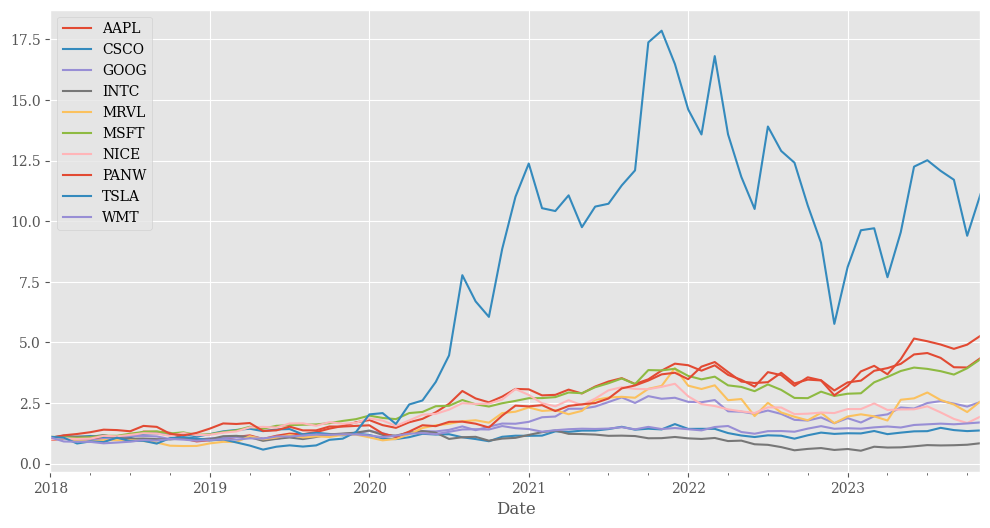

In [27]:
rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(12,6))

### Microsoft Corporation(MSFT) Finansal Analiz:

Yukarıdaki veri setinden tek bir finansal araç seçilerek daha iyi bir finansal gösterge yaratabilmek adına yuvarlanmış bir istatistiksel hesaplama çalışması yapılacaktır. Bunun icin seçilen araç  *Microsoft Corporation* şirketine ait hisse seneti değerleri olacaktır.

In [28]:
msft = 'MSFT'

In [29]:
veri = pd.DataFrame(veri[msft]).dropna()

In [30]:
veri.head()

,MSFT
Date,
2018-01-02,85.949997
2018-01-03,86.349998
2018-01-04,87.110001
2018-01-05,88.190002
2018-01-08,88.279999


Pandas kütüphanesi ile standart yuvarlanma istatistiklerini türetirsek:

In [31]:
window = 20        # dahil edilecek dizin değerlerinin sayısı.

In [32]:
veri['min'] = veri[msft].rolling(window=window).min()

In [33]:
veri['mean'] = veri[msft].rolling(window=window).mean()

In [34]:
veri['std'] = veri[msft].rolling(window=window).std()

In [35]:
veri['max'] = veri[msft].rolling(window=window).max()

In [36]:
veri.dropna().head()

,MSFT,min,mean,std,max
Date,,,,,
2018-01-30,92.739998,85.949997,89.8285,2.433793,94.059998
2018-01-31,95.010002,86.349998,90.2815,2.515684,95.010002
2018-02-01,94.260002,87.110001,90.6770,2.486680,95.010002
2018-02-02,91.779999,87.820000,90.9105,2.349588,95.010002
2018-02-05,88.000000,87.820000,90.9010,2.361520,95.010002


Hesaplanan bu istatistik değerleri son 150 indeks üzerinden grafik olarak gösterilirse;

<Axes: xlabel='Date'>

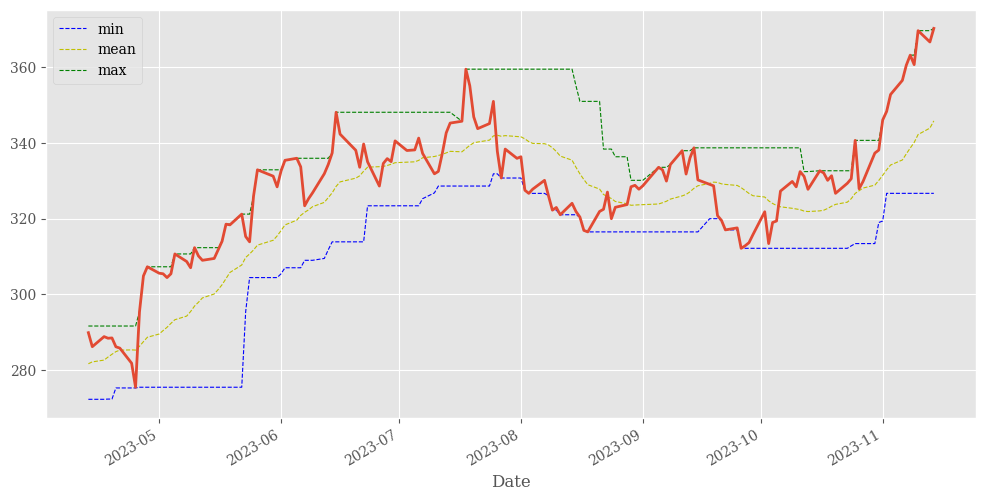

In [37]:
ax = veri[['min', 'mean', 'max']].iloc[-150:].plot(figsize=(12,6),
                                       style=['b--', 'y--', 'g--'], lw=0.8)
veri[msft].iloc[-150:].plot(ax=ax, lw=2.0)

#### Basit Hareketli Ortalama:

Mevcut verinin bir teknik analizi yapilacak olursa iki basit hareketli ortalamadan (BHO) bahsetmemiz gerekiyor. Buna göre kısa vadeli BHO, uzun vadeli BHO'nın üzerinde olduğunda yatırımcının bir hisse senedinde veya finansal araçta uzun pozisyon alması aksi taktirde kısa pozisyon alması gerektiği bilgisini referans alarak, *window* parametresi spesifikasyonuna göre yuvarlanan istatistiki hesaplamaların ortalaması alınarak bahsi gecen ortalama değerler elde edilir.

In [38]:
veri['BHO1'] = veri[msft].rolling(window=32).mean()    # Kisa vadeli BHO

In [39]:
veri['BHO2'] = veri[msft].rolling(window=242).mean()   # Uzun vadeli BHO

In [40]:
veri[[msft, 'BHO1', 'BHO2']].tail()

,MSFT,BHO1,BHO2
Date,,,
2023-11-08,363.200012,331.828129,297.785744
2023-11-09,360.690002,333.345316,298.263678
2023-11-10,369.670013,335.122816,298.768182
2023-11-13,366.679993,336.780315,299.260703
2023-11-14,370.269989,338.484065,299.791736


Hisse senedi fiyatı verilerini ve iki BHO zaman serisini görselleştirirsek;

<Axes: xlabel='Date'>

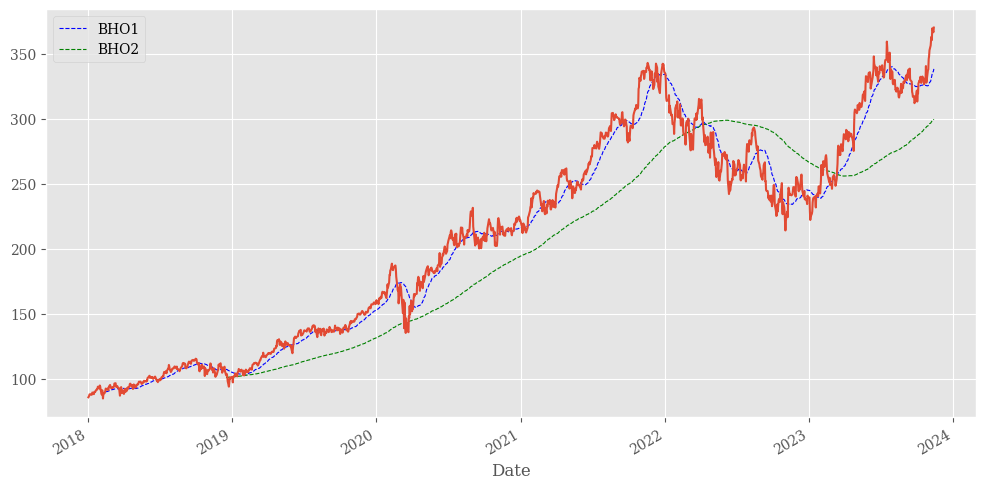

In [41]:
ax = veri[['BHO1', 'BHO2']].plot(
    figsize=(12,6), style=['b--', 'g--'], lw=0.8)
veri[msft].plot(ax=ax, lw=1.5)

                             Microsoft Corporation hisse senedi fiyatı ve iki basit hareketli ortalama

Bahsettigimiz pozisyonlar icin stratejiyi devam ettirirsek;

In [42]:
veri.dropna(inplace=True)         # Yalnızca eksiksiz veri satırları tutulur.

In [43]:
veri['pozisyonlar'] = np.where(veri['BHO1'] > veri['BHO2'],     # Kısa vadeli BHO değerinin uzun vadeli BHO değerinden büyük olması durumunda
                              1,                                # Uzun pozisyon degeri
                              -1)                               # kisa pozisyon degeri

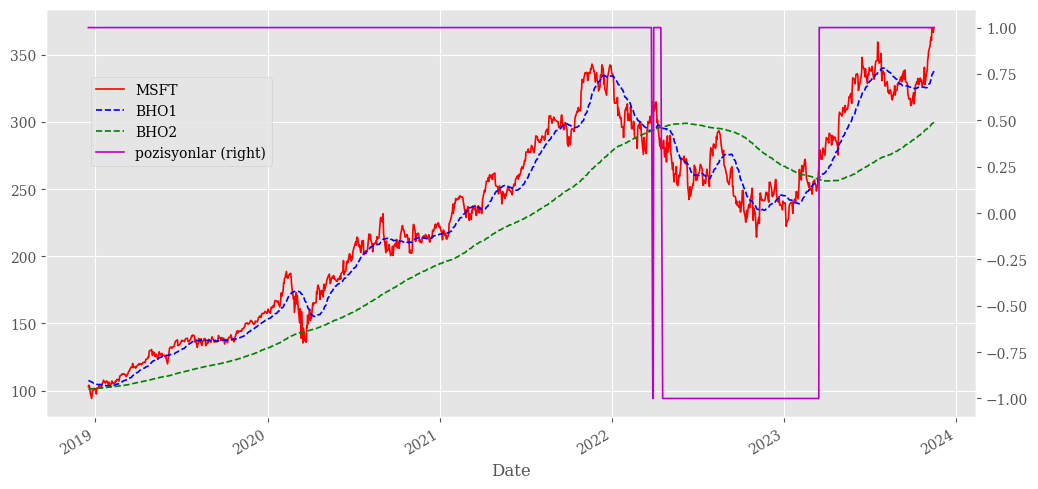

In [44]:
ax = veri[[msft, 'BHO1', 'BHO2', 'pozisyonlar']].plot(
    figsize=(12,6), style=['r', 'b--', 'g--', 'm' ], secondary_y = 'pozisyonlar', lw=1.2)
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

                            Microsoft Corporation hisse senedi fiyatı, iki basit hareketli ortalama ve pozisyon

#### Vektörize Geriye Dönük Test:

Öncelikle log getirileri hesaplanır. Daha sonra +1 veya -1 olarak temsil edilen pozisyonlar ilgili log getirisi ile çarpılır. Son olarak, Microsoft hisse senedi getirilerinin ve BHO'lara dayalı algoritmik ticaret stratejisinin toplanması ve performans değerlerine ulaşmak için üstel fonksiyonun uygulanması gerekir:

In [45]:
veri['Getiriler'] = np.log(veri[msft] / veri[msft].shift(1))   # Microsoft hisse senedinin logaritmik getirilerini hesaplar

Bir gün kaydırılan pozisyon değerleri Microsoft hisse senedinin günlük getirileriyle çarpilir.

In [46]:
veri['Strateji'] = veri['pozisyonlar'].shift(1) * veri['Getiriler']

In [47]:
veri.round(3).head()

,MSFT,min,mean,std,max,BHO1,BHO2,pozisyonlar,Getiriler,Strateji
Date,,,,,,,,,,
2018-12-17,102.89,101.71,107.243,3.044,112.09,107.447,101.051,1,NaN,NaN
2018-12-18,103.97,101.71,107.027,3.119,112.09,107.359,101.125,1,0.010,0.010
2018-12-19,103.69,101.71,106.980,3.163,112.09,107.289,101.197,1,-0.003,-0.003
2018-12-20,101.51,101.51,106.970,3.181,112.09,107.144,101.256,1,-0.021,-0.021
2018-12-21,98.23,98.23,106.726,3.646,112.09,106.854,101.298,1,-0.033,-0.033


In [48]:
veri.dropna(inplace=True)

Strateji ve karşılaştırmalı yatırım için günlük getirilerini özetler ve mutlak performansa ulaşmak için eksponansiyel değeri hesaplar.

In [49]:
np.exp(veri[['Getiriler', 'Strateji']].sum())

Getiriler    3.598698
Strateji     3.637778
dtype: float64

In [59]:
veri[['Getiriler', 'Strateji']].std() * 252 ** 0.5  # Strateji ve referans yatırım için yıllık volatiliteyi hesaplar.

Getiriler    0.309480
Strateji     0.309473
dtype: float64

Algoritmik ticaret stratejisinin analizi ile elde edilen rakamlar, Microsoft hisselerini pasif olarak tutmanın kıyaslama yatırımından daha iyi sonuç alacağımızı gösteriyor.

Microsoft hisselerinin ve algoritmik ticaret stratejisinin zaman içindeki performansını görmek icin aşağıdaki grafiğe bakılabilir:

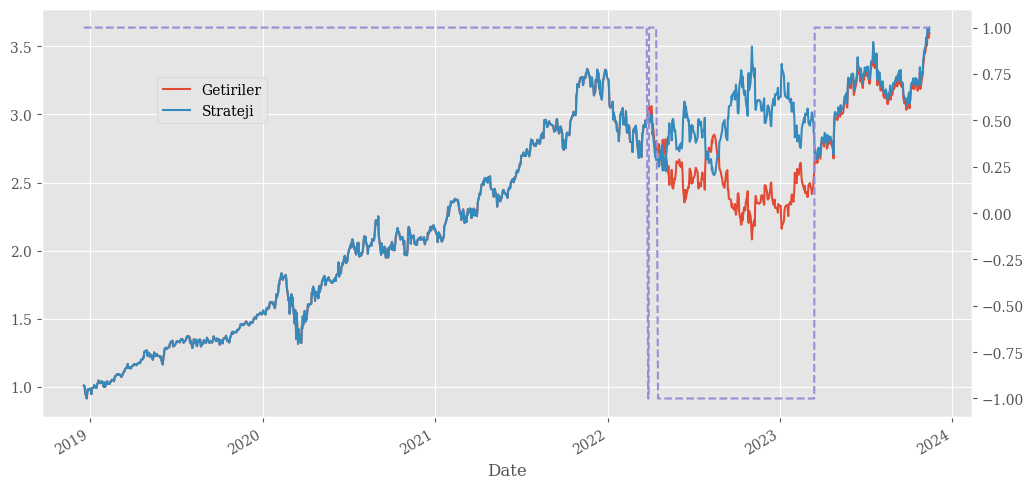

In [61]:
ax = veri[['Getiriler', 'Strateji']].cumsum().apply(np.exp).plot(figsize=(12,6))
veri['pozisyonlar'].plot(ax=ax, secondary_y='pozisyonlar', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

### Python ile Sınıf ve Fonksiyon Oluşturma

Yukarıda tek bir finansal araç üzerinden yapilan test ve analiz çalışmalarını, herhangi bir veri seti icin modelleyerek uygulanmasını kolaylaştıran fonsksiyonlar ve özel sınıflar oluşturabiliriz.

Geriye dönük testi özetleyen fonksiyonu şu şekilde yazabiliriz:

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from pylab import plt, mpl
plt.style.use('ggplot')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
def finansalAnaliz(hisse_s, baslangic, bitis, BHO):
    df= yf.download(hisse_s, start=baslangic, end=bitis)
    veri = df.Close.to_frame()
    veri['getiriler'] = np.log(veri.Close / veri.Close.shift(1))
    veri['BHO_K'] = veri.Close.rolling(int(BHO[0])).mean()
    veri['BHO_U'] = veri.Close.rolling(int(BHO[1])).mean()
    veri.dropna(inplace=True)

    veri['pozisyon'] = np.where(veri['BHO_K'] > veri['BHO_U'], 1,-1)
    veri['strateji'] = veri['pozisyon'].shift(1) * veri['getiriler']
    veri.dropna(inplace=True)
    ret = np.exp(veri['strateji'].sum())
    std = veri['strateji'].std()* np.sqrt(252)
    return ret, std

Yahoo Finance API'sinden istedigimiz herhangi bir finansal araca ait hisse senetlerine ilişkin gün sonu verilerini çekerek bir algoritmik ticaret stratejisi oluşturabiliriz. Örneğın 2000 ve 2023 yıllari arasındaki gün sonu kapanış verilerini temel alan bazı finansal araçların analiz calışması;

In [13]:
finansalAnaliz('GOOG', '2000-01-01', '2023-01-01',(42, 252))

[*********************100%%**********************]  1 of 1 completed


(2.4641791830953435, 0.2987447612263444)

GOOG icin fena olmayan getiri ve standart sapmaya sahip olduğunu söyleyebiliriz.

In [12]:
finansalAnaliz('MSFT', '2000-01-01', '2023-01-01',(42, 252))

[*********************100%%**********************]  1 of 1 completed


(0.39528058338481226, 0.29102221074540857)

MSFT icin geriye dönük strateji ile oldukça kötü bir getiri elde ettik.

#### Şimdi geriye dönük test çalışmasına ilişkin bir sınıf oluşturabiliriz:

Sınıf içindeki önemli bir metod, bir nesnenin her başlatılması sırasında çağrılan *init* metodudur. Nesnenin kendisini (self) ve potansiyel olarak birden fazla nesneyi parametre olarak alır:

In [16]:
class GeriyeDönükTest:
    def __init__(self, sembol, BHO_K, BHO_U, baslangic, bitis):
        self.sembol = sembol
        self.BHO_K = BHO_K
        self.BHO_U = BHO_U
        self.baslangic = baslangic
        self.bitis = bitis
        self.sonuclar = None
        self.veriAl()

    def veriAl(self):
            df= yf.download(self.sembol, start=self.baslangic, end=self.bitis)
            veri = df.Close.to_frame()
            veri['getiriler'] = np.log(veri.Close / veri.Close.shift(1))
            veri['BHO_K'] = veri.Close.rolling(self.BHO_K).mean()
            veri['BHO_U'] = veri.Close.rolling(self.BHO_U).mean()
            veri.dropna(inplace=True)
            self.veri2 = veri
            return veri
    
    def TestSonuc(self): 
            veri = self.veri2.copy().dropna()
            veri['pozisyon'] = np.where(veri['BHO_K'] > veri['BHO_U'], 1,-1)
            veri['strateji'] = veri['pozisyon'].shift(1) * veri['getiriler']
            veri.dropna(inplace=True)
            veri['getiriler_kmlf'] = veri['getiriler'].cumsum().apply(np.exp)
            veri['getiriler_strateji'] =  veri['strateji'].cumsum().apply(np.exp)
            perf = veri['getiriler_strateji'].iloc[-1]
            outperf = perf - veri['getiriler_kmlf'].iloc[-1]
            self.sonuclar = veri
           
            ret = np.exp(veri['strateji'].sum())
            std = veri['strateji'].std()* np.sqrt(252)
            #return ret, std
    
            return round(perf, 6), round(outperf,6)
    
    def Grafik(self):
            if self.sonuclar is None:
                print("Lütfen testi calistirin!")
            else:
                title = "{} | BHO_K={} | BHO_U={}".format(self.sembol, self.BHO_K, self.BHO_U)
                ax= self.sonuclar[['getiriler_kmlf', 'getiriler_strateji']].plot(title = title, figsize=(12,6))
                self.sonuclar['pozisyon'].plot(ax=ax, secondary_y='pozisyon', style='--')
                ax.get_legend().set_bbox_to_anchor((0.25, 0.85))
                

Yine GOOG(Alphabet Inc.) icin geriye dönük test çalışması yapılırsa;

In [26]:
test = GeriyeDönükTest('GOOG', 42,252, '2000-01-01', '2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [27]:
test.TestSonuc()

(2.464179, -10.031449)

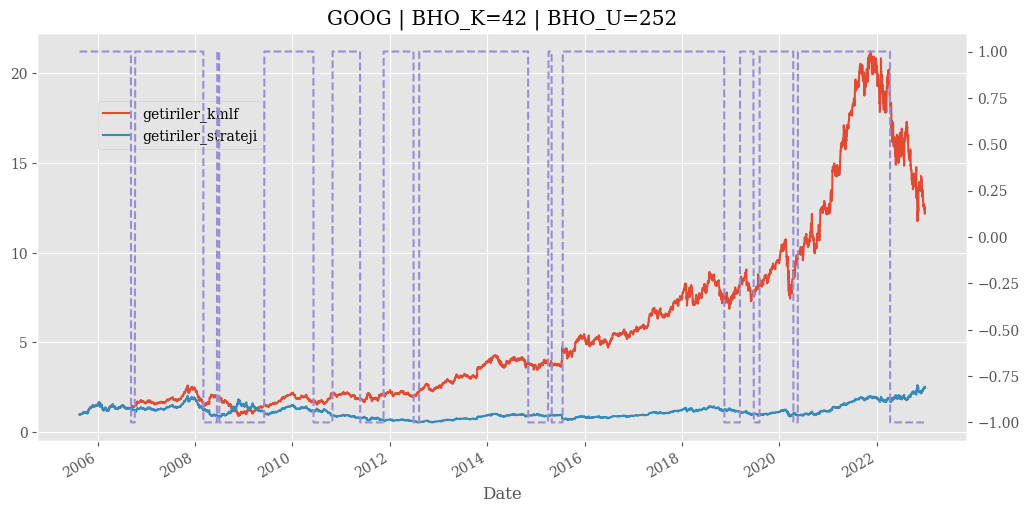

In [28]:
test.Grafik()